# Previsão de rotatividade de clientes aplicado as telecomunicações

##### As empresas de serviços de telecomunicações, em particular, sofrem com a perda de clientes para os concorrentes; isso é conhecido como Churn  ou rotatividade de clientes. O churn causa uma enorme perda de receita para as empresas e pode se tornar um problema muito sério.

##### Em termos gerais, o churn é um indicador de negócio que não se deve ser subestimado. Em mercado onde a competição é cada vez mais implacável, as empresas têm que centrar o seu modelo de negócios no cliente, para proteger o seu bem mais precioso – o próprio cliente.

##### Diante desta realidade, o objetivo deste exercício é determinar quais os principais fatores que explicaram a rotatividade de clientes e prever a probabilidade de um cliente abandonar a empresa. Para atingir o objetivo proposto, serão utilizados dados do Kaggle de customer Churn de uma empresa de telecomunicações. 

### Sobre os dados

Fonte: https://www.kaggle.com/blastchar/telco-customer-churn

Cada linha representa um cliente, cada coluna contém os atributoss do clientes

**O conjunto de dados inclui informações sobre:**

1. Clientes que saíram no último mês - a coluna é chamada de Churn

2. Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes

3. Informações da conta do cliente - há quanto tempo ele é cliente, contrato, método de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes.

Para explorar este tipo de modelos e aprender mais sobre o assunto.

Nova versão da IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [6]:
# Visualizar a versão do Python que estamos utilizando
from platform import python_version
print('Versão da Linguagem Python', python_version())

# Visualizar versão do sistema operacional utilizado
import os
import platform
platform.uname()

Versão da Linguagem Python 3.8.12


uname_result(system='Linux', node='silvio-X99', release='5.11.0-38-generic', version='#42~20.04.1-Ubuntu SMP, machine='x86_64', processor='x86_64')

In [27]:
# Carregando pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as mtick 
from dataprep.eda import plot
from dataprep.eda import plot_correlation

In [28]:
# Importação e Visualização dos Dados
df = pd.read_csv('Telco-Customer-Churn.csv', encoding = "ISO-8859-1")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


| Variáveis       # 2° Análise Exploratória dos Dados | Descrição                |
| ---------------- | ------------------------ |
| customerID       | Identificação do cliente |
| gender           | Sexo                     |
| SeniorCitizen    | Idosos                   |
| Partner          | Cônjuge                  |
| Dependents       | Dependentes              |
| tenure           | Tempo como cliente       |
| PhoneService     | Serviço de telefone      |
| MultipleLines    | Multiplas Linhas         |
| InternetService  | Serviço de internet      |
| OnlineSecurity   | Segurança online         |
| OnlineBackup     | Backup Online            |
| DeviceProtection | Proteção de dispositivo  |
| TechSupport      | Suporte Técnico          |
| StreamingTV      | Streaming de TV          |
| StreamingMovies  | Streaming de Movies      |
| Contract         | Contrato                 |
| PaperlessBilling | Fatura sem papel         |
| PaymentMethod    | Método de pagamento      |
| MonthlyCharges   | Encargos Mensais         |
| TotalCharges     | Custos Totais            |
| Churn            | Churn                    |

## Análise Exploratória dos Dados


Vamos primeiro começar explorando nosso conjunto de dados, para entender melhor os padrões nos dados e, potencialmente, formar algumas hipóteses.

In [ ]:
# Visualizar distribuição da variável Churn
plot(df, "Churn")

É possível observar que 26,5% é o churn dos clientes, em outras palavras a rotatividade dos clientes é de 1/4.

É esperado que a maior parte dos clientes não se desligasse. É importante ter isso em mente, pois a assimetria pode levar a muitos falsos negativos.          

In [ ]:
# Visualizar distribuição da variável sexo
plot(df, "gender")

É possível observar que a distribuição entre clientes do sexo masculino e feminino são semelhantes

In [ ]:
# Visualizar distribuição da variável SeniorCitizen (Idosos)
plot(df, "SeniorCitizen")

Apenas 16,2% dos clientes são seniores. Sendo assim, a maioria dos nossos clientes nos dados são jovens. 

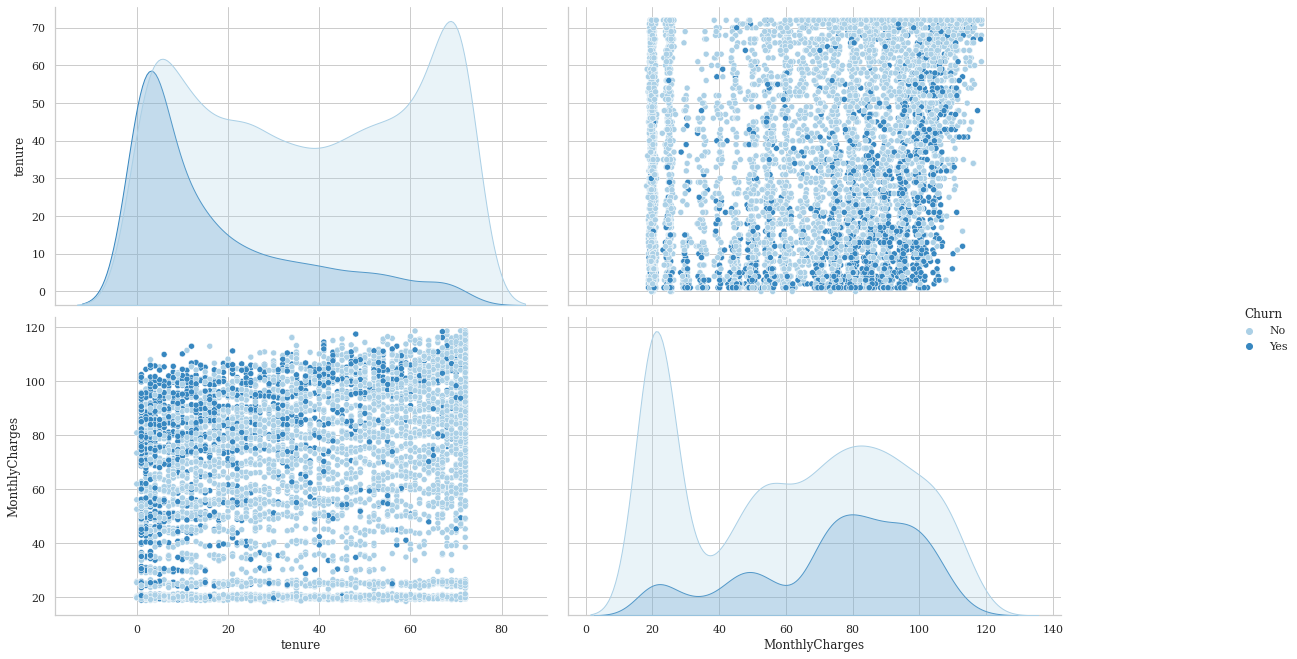

In [6]:
# Explorar relação entre as variáveis

# Setando configuração de fonte e tamanho da imagem
sns.set_style( "whitegrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

# Gerar gráfico com countplot
ax = sns.pairplot(df[['Churn', 'tenure', 'MonthlyCharges']], 
                  hue="Churn",
                  palette="Blues")

# Tamanho da figura
ax.fig.set_size_inches(20,10)

# Plotar
plt.show()

Os histogramas nos dizem que a distribuição de tenure de clientes churned é assimétrica a direita, enquanto a mesma distribuição para clientes não churned é mais uniforme. 

Isso também mostra que os clientes com altos MonthlyCharges (encargos mensais) apresentam taxas maiores de desligamento.

Os outros dois gráficos capturam informações muito semelhantes.


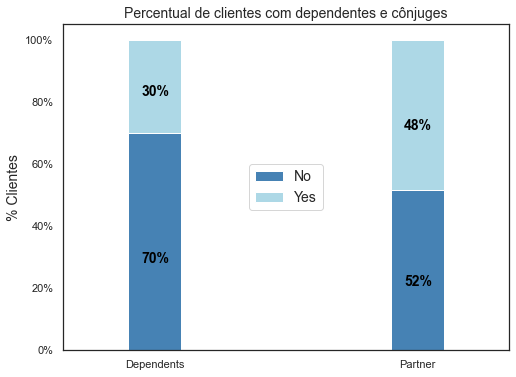

In [32]:
# Percentual de clientes com dependentes e cônjuges

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4682B4','#ADD8E6']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                      width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clientes',size = 14)
ax.set_xlabel('')
ax.set_title('Percentual de clientes com dependentes e cônjuges',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
                weight = 'bold',
                size = 14)

É possível observar que cerca de 50% dos clientes possuem parceiro, enquanto apenas 30% do total de clientes possuem dependentes.

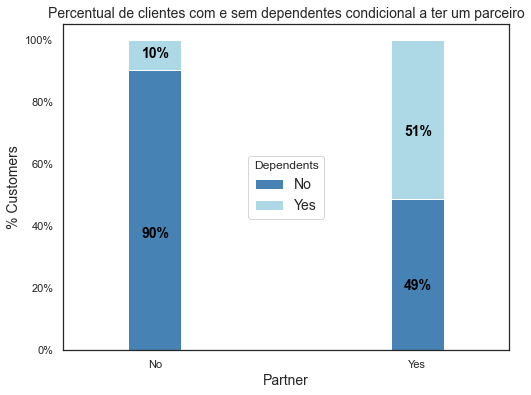

In [33]:
# Percentual de clientes com e sem dependentes condicional a ter um parceiro.

colors = ['#4682B4','#ADD8E6']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Percentual de clientes com e sem dependentes condicional a ter um parceiro',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',
               size = 14)

Curiosamente, entre os clientes com parceiro, apenas cerca de metade deles também possui dependente, enquanto a outra metade não possui dependentes.
Além disso, como esperado, entre os clientes que não possuem parceiro, a maioria (80%) deles não possui dependentes.

## Pré-processamento dos Dados

Nesta etapa as variáveis serão codificadas e serão geradas dummies, para seja possível explorar outras variáveis e  posteriormente aplicarmos as técnicas de machine learning

In [9]:
# Ver informações do df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Remover colunas desnecessárias
df.drop(['customerID'], axis=1, inplace=True)

In [11]:
# Converter string para numérico 

# Fazer replace de vazio ' ' para NAN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Contar missings
df.isna().sum()

# Dropar missings
df.dropna(inplace=True)

# Converter para númerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
# Replace yes e No para 1 ou 0 para churn e SeniorCitizen
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

# ver df
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
# Transformando as outras colunas em dummies
df_onehot = pd.get_dummies(df)
df_onehot.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [14]:
# Visualizar nomes das colunas
print(df_onehot.columns.tolist())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMetho

In [15]:
# Codificar corretamente os dados
col_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 
             'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 
             'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 
             'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
             'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
             'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
             'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
             'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for i in list(col_names):
    df_onehot[i] = df_onehot[i].astype(np.int64)

In [16]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   tenure                                   7032 non-null   int64
 2   MonthlyCharges                           7032 non-null   int64
 3   TotalCharges                             7032 non-null   int64
 4   Churn                                    7032 non-null   int64
 5   gender_Female                            7032 non-null   int64
 6   gender_Male                              7032 non-null   int64
 7   Partner_No                               7032 non-null   int64
 8   Partner_Yes                              7032 non-null   int64
 9   Dependents_No                            7032 non-null   int64
 10  Dependents_Yes                           7032 non-null   int64
 11  Phon

### Dando continuidade a análise exploratória

In [24]:
# Estatísticas Descritivas
df_onehot.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.0,0.0,0.0,0.00,1.0
tenure,7032.0,32.421786,24.545260,1.0,9.0,29.0,55.00,72.0
MonthlyCharges,7032.0,64.332480,30.088668,18.0,35.0,70.0,89.00,118.0
TotalCharges,7032.0,2282.830489,2266.768490,18.0,401.0,1397.0,3794.25,8684.0
Churn,7032.0,0.265785,0.441782,0.0,0.0,0.0,1.00,1.0
gender_Female,7032.0,0.495307,0.500014,0.0,0.0,0.0,1.00,1.0
gender_Male,7032.0,0.504693,0.500014,0.0,0.0,1.0,1.00,1.0
Partner_No,7032.0,0.517491,0.499729,0.0,0.0,1.0,1.00,1.0
Partner_Yes,7032.0,0.482509,0.499729,0.0,0.0,0.0,1.00,1.0
Dependents_No,7032.0,0.701507,0.457629,0.0,0.0,1.0,1.00,1.0


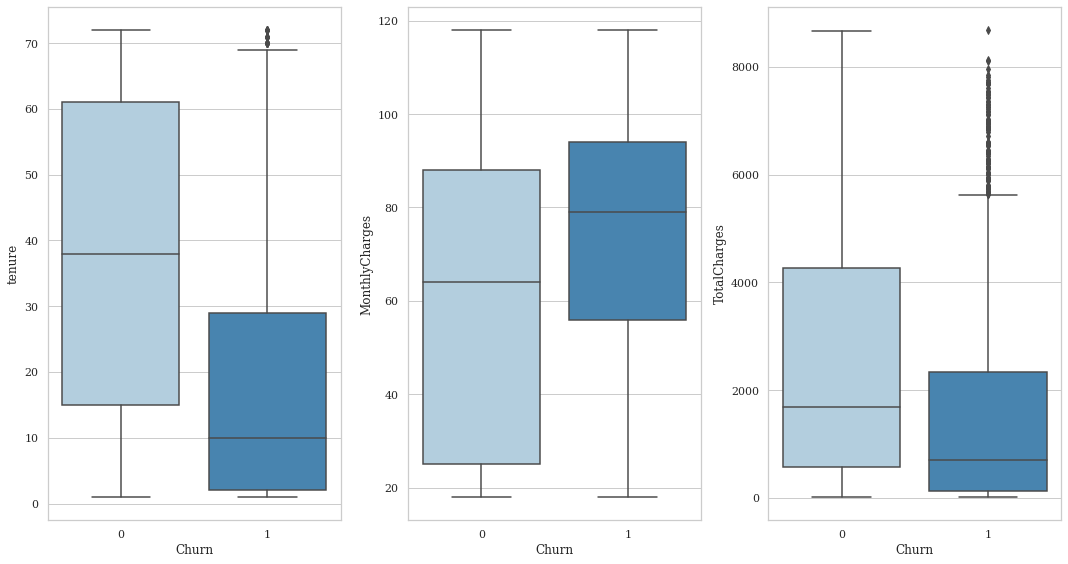

In [25]:
# Boxplot churn-tenure e churn-MonthlyCharges

# Setando configuração de fonte e tamanho da imagem
sns.set_style( "whitegrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.boxplot(x='Churn', y='tenure', 
            data=df_onehot, 
            palette="Blues",
            ax=axs[0])
sns.boxplot(x='Churn', y='MonthlyCharges', 
            data=df_onehot, 
            palette="Blues",
            ax=axs[1])
sns.boxplot(x='Churn', y='TotalCharges', 
            data=df_onehot, 
            palette="Blues",
            ax=axs[2])
# plotar
plt.tight_layout()

Pelos boxplots é possível ilustrar as diferenças de quantis entre os clientes que abandonaram (churned) e os que não abandonaram.              

**Gráfico 1**
O primeiro gráfico de caixa compara os quantis de tenure (posse) entre os dois grupos.                
A duração média para clientes que cancelam é muito menor do que para clientes que não cancelam.               
75% dos clientes que acabam abandonando o fazem nos primeiros 30 meses.                   
É possível observar alguns valores discrepantes que surgiram depois de 70 meses. 

**Gráfico 2**
O segundo gráfico de caixa compara MonthlyCharges (encargos mensais) com a rotatividade.              
A mediana dos encargos mensais de clientes que abandonam é significativamente maior do que aqueles que não abandonam a empresa.               
Isso sugere que descontos e promoções podem ser um motivo atraente para os clientes ficarem.      

**Gráfico 3**
O Terceiro gráfico de caixa compara TotalCharges (encargos totais) com a rotatividade.                         
A mediana dos encargos totais de clientes que abandonam é significativamente menor do que aqueles que não abandonam.              
Também É possível observar alguns valores discrepantes próximo de 6.000.      

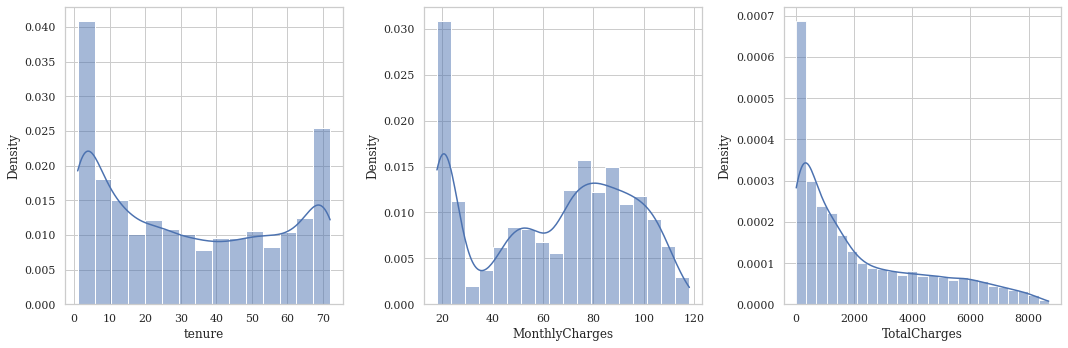

In [27]:
# Plotar distribuição das variáveis continuas antes da normalização

# Definindo variáveis que serão plotadas
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Criar figuras e eixos
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes = axes.ravel()  # Achatar a matriz torna a indexação mais fácil

for col, ax in zip(cols, axes):
    sns.histplot(data=df_onehot[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

**Gráfico 1**
No histograma da variável Tenure,  podemos observar que muitos clientes estão com a empresa de telecomunicações há apenas um mês, enquanto muitos estão lá cerca de 72 meses.              
Isso pode ocorrer potencialmente porque clientes diferentes têm contratos diferentes. 
Sendo assim, olhar para a categoria de contrato em que eles estão, pode ser mais informativo.

**Gráfico 2**
Em geral, os clientes possuem encargos mensais na faixa de $20.

**Gráfico 3**
O histograma dos encargos totais sugere a existência de uma elasticidade preço da demanda negativa, em outras palavras, quanto maiores os encargos totais, menor é demanda pelos serviços. 

In [29]:
# Normalizar dados com MinMaxScaler
scaler = MinMaxScaler()
df_onehot['tenure'] = scaler.fit_transform(df_onehot['tenure'].values.reshape(-1, 1))
df_onehot['MonthlyCharges'] = scaler.fit_transform(df_onehot['MonthlyCharges'].values.reshape(-1, 1))
df_onehot['TotalCharges'] = scaler.fit_transform(df_onehot['TotalCharges'].values.reshape(-1, 1))

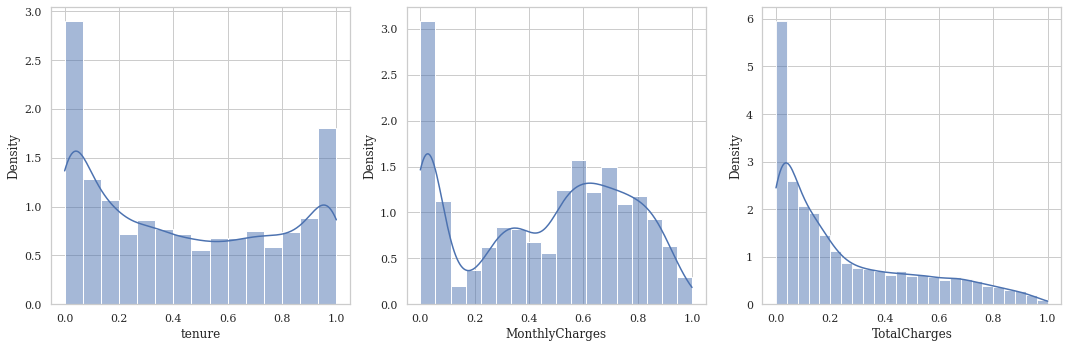

In [30]:
# Plotar distribuição das variáveis continuas após a normalização

# Definindo variáveis que serão plotadas
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Figuras e eixos
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes = axes.ravel()  # Achatar a matriz torna a indexação mais fácil

for col, ax in zip(cols, axes):
    sns.histplot(data=df_onehot[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

É possível notar que os valores agora variam entre 0 e 1, mantendo a mesma distribuição anterior.

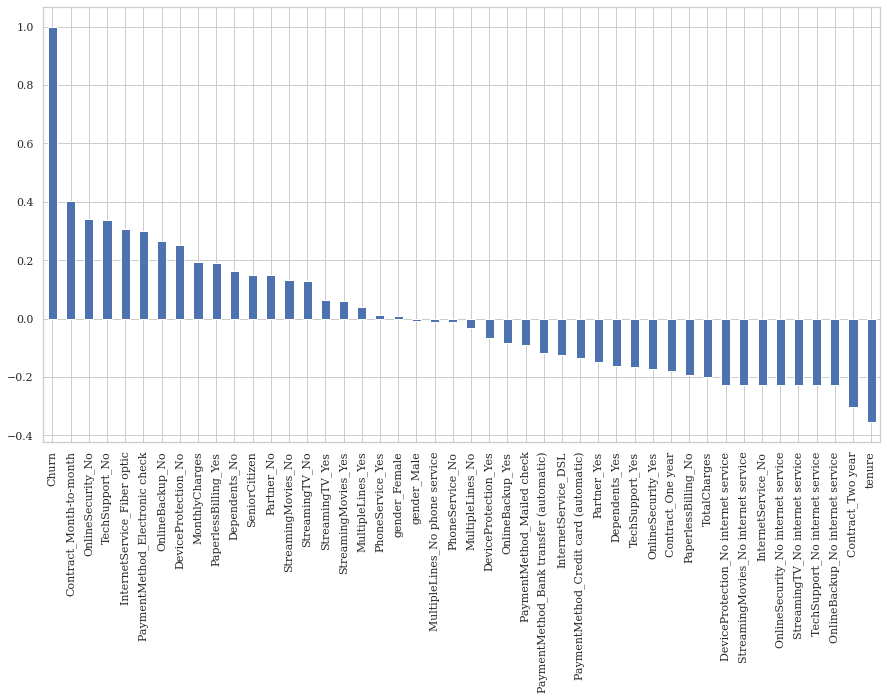

In [32]:
# Gerar gráfico de correlação do "Churn" com outras variaveis:
plt.figure(figsize=(15,8))
df_onehot.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Contratos mensais, ausência de segurança online e suporte técnico parecem estar positivamente correlacionados com o churn.     

Enquanto, os contratos de posse e de dois anos parecem estar negativamente correlacionados com a rotatividade.

Curiosamente, serviços como segurança online, streaming de TV, backup online, suporte técnico, etc., sem conexão com a Internet, parecem estar negativamente relacionados ao churn.

## Construção das Máquinas Preditivas com pycaret

PyCaret é uma biblioteca de aprendizado de máquina de código aberto e  baixo código em Python que permite ir desde a preparação de seus dados até a implantação de seu modelo em minutos, em sua escolha de ambiente de notebook.

* ver mais informações em:                   
https://pycaret.org/                          
https://pycaret.org/classification1/

In [34]:
# Instalar pacotes
#!pip3 install pycaret
#!pip3 install shap

# Ver versão do pycaret
from pycaret import classification

In [35]:
# Preparar classificador
classification_setup = classification.setup(data= df_onehot, 
                                            target ='Churn', 
                                            use_gpu=True, 
                                            feature_selection=True,
                                            remove_multicollinearity=True,
                                            normalize=False,
                                            transformation=True,
                                            session_id = 2021)

,Description,Value
0,session_id,2021
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7032, 46)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,42
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                                                    random_state=2021,

In [36]:
# Criar Modelo
classification.compare_models(round=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.805,0.845,0.540,0.666,0.596,0.469,0.474,0.191
ada,Ada Boost Classifier,0.802,0.845,0.521,0.662,0.582,0.455,0.461,0.263
lda,Linear Discriminant Analysis,0.802,0.841,0.525,0.661,0.584,0.456,0.462,0.106
gbc,Gradient Boosting Classifier,0.801,0.846,0.525,0.658,0.583,0.455,0.461,0.653
ridge,Ridge Classifier,0.798,0.000,0.475,0.673,0.556,0.431,0.442,0.046
lightgbm,Light Gradient Boosting Machine,0.794,0.832,0.527,0.638,0.576,0.442,0.446,0.245
rf,Random Forest Classifier,0.787,0.820,0.495,0.628,0.553,0.416,0.422,0.856
xgboost,Extreme Gradient Boosting,0.787,0.818,0.521,0.618,0.565,0.425,0.428,0.501
svm,SVM - Linear Kernel,0.784,0.000,0.584,0.613,0.585,0.442,0.452,0.097
knn,K Neighbors Classifier,0.777,0.789,0.498,0.597,0.543,0.397,0.400,0.369


create_model_container: 15
master_model_container: 15
display_container: 2
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Reproduzir o melhor modelo
Model_Logit = classification.create_model('lr')
print(Model_Logit)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7992,0.8418,0.5191,0.6538,0.5787,0.4492,0.4543
1,0.8134,0.8468,0.5191,0.7010,0.5965,0.4786,0.4877
2,0.8110,0.8514,0.5344,0.6863,0.6009,0.4795,0.4860
3,0.7927,0.8267,0.5344,0.6306,0.5785,0.4423,0.4450
4,0.8110,0.8428,0.5420,0.6827,0.6043,0.4822,0.4878
5,0.8130,0.8704,0.5649,0.6789,0.6167,0.4944,0.4980
6,0.7825,0.8364,0.5191,0.6071,0.5597,0.4164,0.4187
7,0.8110,0.8587,0.5496,0.6792,0.6076,0.4849,0.4896
8,0.8211,0.8560,0.6183,0.6807,0.6480,0.5285,0.5296
9,0.7967,0.8208,0.4962,0.6566,0.5652,0.4359,0.4432


create_model_container: 16
master_model_container: 16
display_container: 3
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
create_model() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [38]:
# Ver parâmetros do modelo
classification.plot_model(Model_Logit, plot='parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


Visual Rendered Successfully
plot_model() succesfully completed......................................


**Matriz de confusão**
            
As matrizes de confusão fornecem um objeto visual de como um modelo de machine learning está cometendo erros sistemáticos em suas previsões para modelos de classificação. A palavra "confusão" no nome vem de um modelo "confuso" ou de amostras de rotulagem incorreta. 

A matriz de confusão de um modelo bom terá a maioria das amostras ao longo da diagonal.

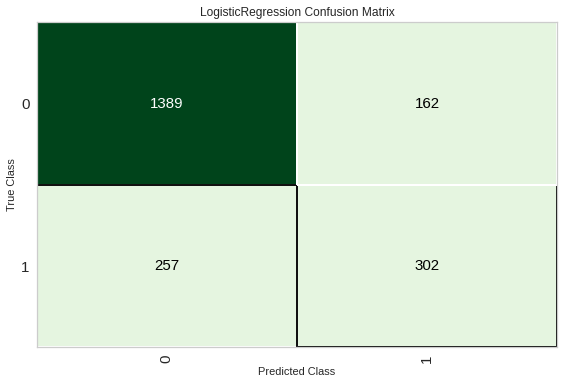

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [40]:
# Matrix de confusão
classification.plot_model(Model_Logit, plot = 'confusion_matrix')

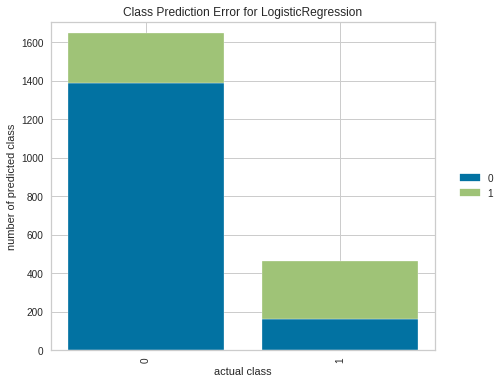

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [42]:
# Plotar os erros do modelo
classification.plot_model(Model_Logit, plot='error')

**Curva ROC**

A curva de característica operacional do receptor (ROC) plota a relação entre taxa de verdadeiro positivo (TPR) e a taxa de falso positivo (FPR) à medida que o limite de decisão muda. A curva ROC pode ser menos informativa ao treinar modelos em conjuntos de dados com alto desequilíbrio de classe, já que a classe majoritária pode anular contribuições de classes minoritárias.

A área sob a curva (AUC) pode ser interpretada como a proporção de amostras classificadas corretamente. Mais precisamente, a AUC é a probabilidade de o classificador classificar uma amostra positiva escolhido aleatoriamente mais acima do que uma amostra negativa escolhido aleatoriamente. A forma da curva proporciona uma intuição para a relação entre TPR e FPR como uma função do limite de classificação ou do limite de decisão.

Uma curva que se aproxima do canto superior esquerdo do gráfico está se aproximando de um TPR 100% e FPR 0%, o melhor modelo possível. Um modelo aleatório produziria uma curva ROC ao longo da linha y = x do canto inferior esquerdo para a parte superior direita. Um modelo pior do que o aleatório teria uma curva ROC que fica abaixo da linha y = x.

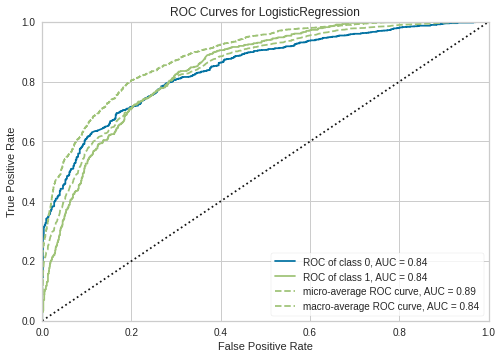

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [43]:
# plotar gráfico AUC-ROC
classification.plot_model(Model_Logit, plot = 'auc')

**Curva de precisão-recall**    

A curva de precisão-recall plota a relação entre precisão e recall à medida que o limite de decisão é alterado.    
Recall é a capacidade de um modelo para detectar todos os exemplos positivos e a precisão é a capacidade de um modelo evitar rotular amostras negativas como positivas. Alguns problemas empresariais podem exigir uma recall mais alta e uma precisão mais alta, dependendo da importância relativa de evitar falsos negativos versus falsos positivos.

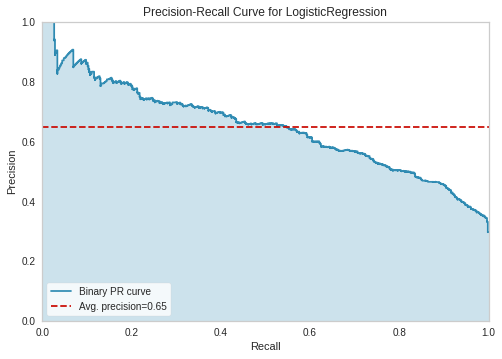

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [44]:
# plotar curva de precisão-recall
classification.plot_model(Model_Logit, plot = 'pr')

**Melhores Features**

Aqui são plotados os atributos mais importantes para o modelo.

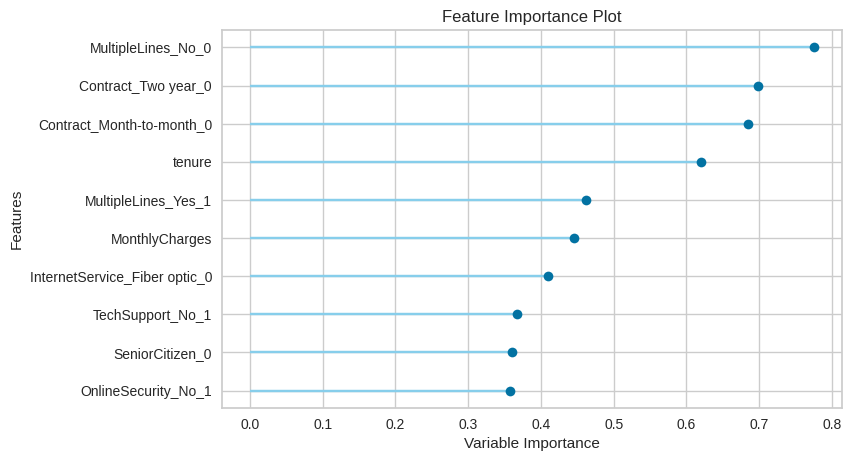

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [45]:
# Importância dos atributos
classification.plot_model(Model_Logit, plot='feature')

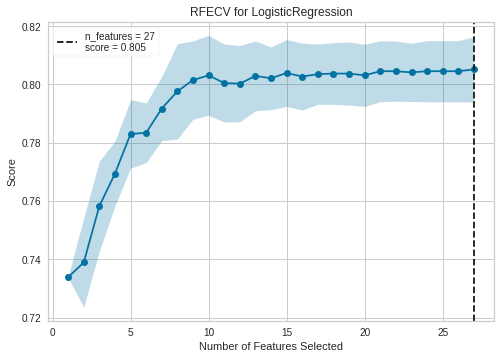

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [46]:
# Plotar Curva de seleção de atributos
classification.plot_model(Model_Logit, plot='rfe')

# Podemos notar que é possível obter resultados semelhantes com apenas 10 atributos

**Curva de Aprendizado**

Uma curva de aprendizado mostra a validação e a pontuação de treinamento de um estimador para vários números de amostras de treinamento. É uma ferramenta para descobrir o quanto nos beneficiamos ao adicionar mais dados de treinamento e se o estimador sofre mais com um erro de variância ou um erro de polarização. 

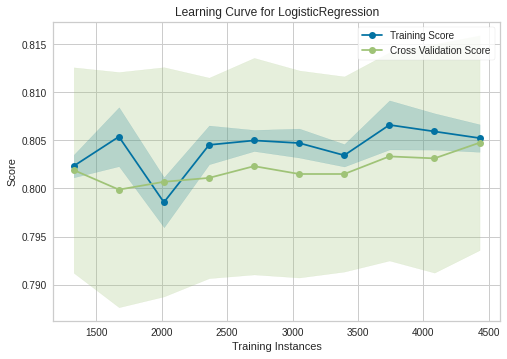

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [47]:
# Plotar curva de aprendizado
classification.plot_model(Model_Logit, plot='learning')

**Curva de calibragem**         

A curva de calibragem plota a confiança de um modelo nas suas previsões em relação à proporção de amostras positivas em cada nível de confiança. Um modelo bem calibrado classificará corretamente 100% das previsões às quais atribui 100% de confiança, 50% das previsões que atribui 50% de confiança, 20% das previsões que atribui uma confiança de 20% e assim por diante. Um modelo perfeitamente calibrado terá uma curva de calibragem após a linha y = x em que o modelo prevê perfeitamente a probabilidade de que as amostras pertençam a cada classe.

Um modelo sobreajustado superestimará as previsões de probabilidades próximas de zero e um, raramente incertas sobre a classe de cada amostra e a curva de calibração será semelhante a um "S" de trás para frente. Um modelo subajustado atribuirá uma probabilidade menor em média à classe que ele prevê e a curva de calibração associada será semelhante a um "S". A curva de calibragem não descreve a capacidade de um modelo para classificar corretamente, mas, em vez disso, sua capacidade de atribuir corretamente confiança a suas previsões. Um modelo ruim ainda pode ter uma boa curva de calibragem se o modelo atribui corretamente baixa confiança e alta incerteza.

Observação         
A curva de calibragem é sensível ao número de amostras, de modo que um pequeno conjunto de validação pode produzir resultados com ruídos que podem ser difíceis de interpretar. Isso não significa, necessariamente, que o modelo não esteja bem calibrado.

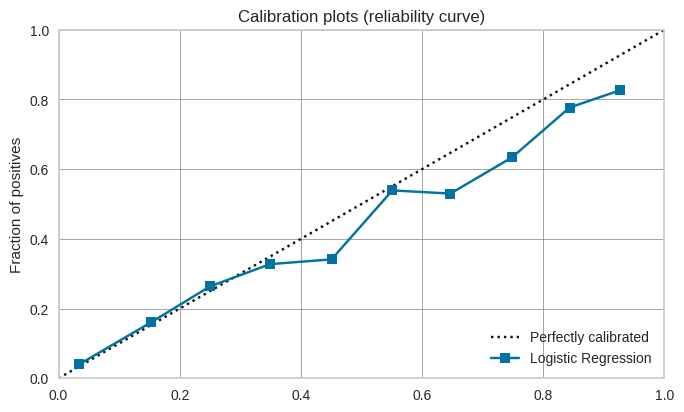

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [48]:
# Plotar curva de aprendizado
classification.plot_model(Model_Logit, plot='calibration')

## Redes Neurais com AutoKeras

AutoKeras: um sistema AutoML baseado em Keras. É desenvolvido pelo DATA Lab na Texas A&M University


**Ver mais detalhes em:**            
https://autokeras.com/           
https://autokeras.com/tutorial/structured_data_classification/

In [49]:
# Instalando e carregando autokeas
#!pip3 install autokeras
from autokeras import StructuredDataClassifier
import autokeras as ak
import keras
from sklearn.model_selection import train_test_split

2021-12-28 17:48:51.241056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-28 17:48:51.241087: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [50]:
# Fazendo o onehot encoder
df_Keras = df_onehot[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 
                      'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 
                      'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 
                      'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
                      'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
                      'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                      'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                      'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']]
df_Keras.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0.000000,0.11,0.001269,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0.464789,0.38,0.215901,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0.014085,0.35,0.010385,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1


In [51]:
# Preparando * dataframe
target_col = "Churn"
X = df_Keras.loc[:, df_Keras.columns != target_col]
y = df_Keras.loc[:, target_col]

# Divindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 2021)

In [52]:
# Setando parâmetros
search = ak.StructuredDataClassifier(max_trials=20,
                                     seed=2021,
                                     overwrite=True,
                                     )

In [53]:
# Executando o algoritmo
search.fit(x=X_train, 
           y=y_train, 
           epochs=100, 
           validation_split=0.2, 
           )

Oracle triggered exit


Trial 20 Complete [00h 00m 23s]
val_accuracy: 0.7951482534408569

Best val_accuracy So Far: 0.805031418800354
Total elapsed time: 00h 07m 59s
Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5265 - accuracy: 0.7396
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.7652
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7596
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4621 - accuracy: 0.7641
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.7748
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7669
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7714
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4586 - accuracy: 0.7675
Epoch 9/100
176/176 [=============================

2021-12-28 17:58:03.238749: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Assets written to: ./structured_data_classifier/best_model/assets


In [54]:
# Gerando as predições
predicted_y = search.predict(X_test)

# Avaliar  modelo com dados de teste..
print(search.evaluate(X_test, y_test))

44/44 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.7953
[0.45338350534439087, 0.7953091859817505]


In [55]:
# Printar métricas com dados de treino e teste
loss, acc = search.evaluate(X_train, y_train, verbose=0)
print('Accuracy com dados de treino é {}'.format(acc))

loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy com dados de teste é {}'.format(acc))

Accuracy com dados de treino é 0.8064000010490417
Accuracy com dados de teste é 0.7953091859817505


In [56]:
# Outras Métricas
from sklearn.metrics import classification_report
matrix = classification_report(y_test, predicted_y,labels=[1,0])
print('Métricas \n',matrix)

Métricas 
               precision    recall  f1-score   support

           1       0.65      0.44      0.52       362
           0       0.82      0.92      0.87      1045

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



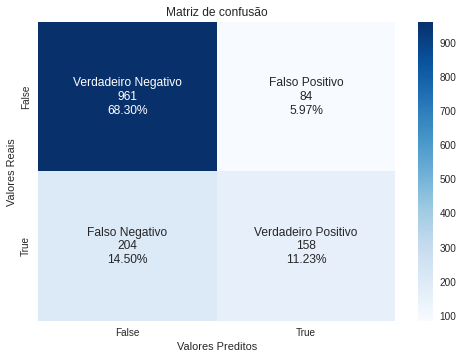

In [57]:
# Gerar Matrix de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_y)

group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Matriz de confusão');
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Reais');

## Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotar matrix de confunsão
plt.show()

### Resumo das métricas encontradas em todos os modelos e comentários finais

Em média os melhores modelos atingiram a acurácia de 79% a 80%, onde o melhor modelo foi a regressão logística.

Nota:        
Caberia ainda recorrer para o tuning de parâmetros para tentar obter modelos com melhores previsões.

________________________________________________

## Avaliação Econométrica da contribuição de cada atributo para o churn

Nesta seção utilizaremos estimador de regressão logística para interpretar os coeficientes, deforma a tirar mais insights dos dados. 

Não são utilizados todas as variáveis para evitar problemas de multicolinearidade que poderia enviesar os coeficientes estimados.

In [17]:
# Transformando as outras colunas em dummies
df_2 = pd.get_dummies(df)
df_2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [18]:
# Codificar corretamente os dados
col_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 
             'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 
             'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 
             'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
             'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
             'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
             'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
             'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for i in list(col_names):
    df_2[i] = df_2[i].astype(np.int64)

In [19]:
# Estatisticas Descritivas
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.332480,2282.830489,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.088668,2266.768490,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.000000,401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.000000,1397.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.000000,3794.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.000000,8684.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Gerar logaritmo  ritmo natural das variáveis continuas
df_2['ln_MonthlyCharges'] = np.log(df_2['MonthlyCharges'])
df_2['ln_SeniorCitizen'] = np.log(df_2['SeniorCitizen'] + 1) # somando 1 devido ao dominío dos logaritmos
df_2['ln_TotalCharges'] = np.log(df_2['TotalCharges'])
df_2['ln_tenure']  = np.log(df_2['tenure'])

# dropar colunas que não vou utilizar
df_2.drop(['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure'], axis=1, inplace=True)

# ver df
df_2.head(5)

,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ln_MonthlyCharges,ln_SeniorCitizen,ln_TotalCharges,ln_tenure
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,3.367296,0.0,3.367296,0.000000
1,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,0,1,4.025352,0.0,7.543803,3.526361
2,1,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,3.970292,0.0,4.682131,0.693147
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,0,3.737670,0.0,7.517521,3.806662
4,1,1,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,4.248495,0.0,5.017280,0.693147


In [21]:
# Estatísticas Descritivas
df_2.describe()

,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ln_MonthlyCharges,ln_SeniorCitizen,ln_TotalCharges,ln_tenure
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,0.096701,0.903299,0.481371,...,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100,4.012383,0.112567,6.937622,2.917870
std,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,0.295571,0.295571,0.499688,...,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637,0.601184,0.255663,1.556342,1.324953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.890372,0.000000,2.890372,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.555348,0.000000,5.993961,2.197225
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.248495,0.000000,7.242082,3.367296
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.488636,0.000000,8.241242,4.007333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.770685,0.693147,9.069238,4.276666


## Rodar teste de inflator de variância para verificar se temos multicolinearidade entre as variáveis escolhidas

A regressão logística é sensível a problemas de multicolinearidade (altos níveis de correlação entre as variáveis independentes).             

Na regressão logística o tamanho da amostra é fundamental. Amostras pequenas tendem a produzir estimativas inconsistentes. Por outro lado, amostras excessivamente grandes aumentam o poder dos testes estatísticos de tal sorte que qualquer efeito tende a ser estatisticamente significativo, independentemente da magnitude.                      
Hosmer e Lemeshow (2000) sugerem um mínimo de 400 obs.                      
Hair et al. (2009) sugerem uma razão de 10 casos para cada variável independente incluída no modelo.               
Pedhazur (1982) recomenda uma razão de 30 casos para cada parâmetro estimado.                   

Existem diferentes procedimentos para minimizar esse problema:
* Aumentar o número de observações (Kennedy, 2005).            
* Técnica de redução de dados para criar uma medida síntese a partir da variância das variáveis originais. 

Detectando multicolinearidade com VIF.            
A multicolinearidade ocorre quando há duas ou mais variáveis independentes em um modelo de regressão múltipla, que possuem uma alta correlação entre si.               
Quando alguns recursos são altamente correlacionados, podemos ter dificuldade em distinguir entre seus efeitos individuais na variável dependente.                 
A multicolinearidade pode ser detectada usando várias técnicas, uma delas é o Variance Inflation Factor (VIF).                      
No método VIF, escolhemos cada recurso e o regredimos em relação a todos os outros recursos. Para cada regressão, o fator é calculado como:

VIF = 1/(1-R²)

Onde, R-quadrado é o coeficiente de determinação na regressão linear. Seu valor está entre 0 e 1. 

Como podemos ver pela fórmula, quanto maior o valor de ², maior é o VIF. Portanto, maior VIF denota maior correlação. Isso está de acordo com o fato de que um valor do R² mais alto denota uma colinearidade mais forte. Geralmente, um VIF acima de 5 indica uma alta multicolinearidade. Implementando VIF usando modelos de estatísticas: modelos de estatísticas fornecem uma função chamada variance_inflation_factor () para calcular VIF. 


In [22]:
# Selecionando as variáveis
#X = df_2[['InternetService_Fiber optic', 'OnlineSecurity_Yes', 'Contract_Month-to-month', 'StreamingMovies_Yes', 'StreamingTV_Yes', 'PaperlessBilling_Yes', 
#          'ln_SeniorCitizen', 'DeviceProtection_Yes', 'OnlineBackup_No', 'Partner_Yes', 'PhoneService_Yes', 'gender_Male', 'InternetService_No', 'Dependents_Yes', 
#          'PaymentMethod_Bank transfer (automatic)', 'ln_MonthlyCharges', 'ln_TotalCharges', 'PaymentMethod_Credit card (automatic)', 'TechSupport_Yes', 'ln_tenure',  
#          'MultipleLines_No',  'Contract_Two year']]

# Selecionar variáveis independentes
X = df_2[['InternetService_Fiber optic', 'Contract_Month-to-month', 'StreamingMovies_Yes', 'StreamingTV_Yes', 'PaperlessBilling_Yes', 
          'ln_SeniorCitizen', 'DeviceProtection_Yes', 'OnlineBackup_No', 'Partner_Yes', 'gender_Male', 'InternetService_No', 'Dependents_Yes', 
          'PaymentMethod_Bank transfer (automatic)', 'ln_MonthlyCharges', 'PaymentMethod_Credit card (automatic)',   
          'TechSupport_Yes', 'ln_tenure','MultipleLines_No',  'Contract_Two year' , 'OnlineSecurity_Yes']]

# Selecionar variável dependente
Y = df_2[['Churn']]

In [23]:
# Carregar teste VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variáveis"] = X.columns

# Calculando o VIF para cada variável
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                  Variáveis        VIF
0               InternetService_Fiber optic   3.217676
1                   Contract_Month-to-month   5.132928
2                       StreamingMovies_Yes   2.710508
3                           StreamingTV_Yes   2.676595
4                      PaperlessBilling_Yes   2.950948
5                          ln_SeniorCitizen   1.371283
6                      DeviceProtection_Yes   2.266746
7                           OnlineBackup_No   2.540641
8                               Partner_Yes   2.797049
9                               gender_Male   2.017617
10                       InternetService_No   2.890641
11                           Dependents_Yes   1.961174
12  PaymentMethod_Bank transfer (automatic)   1.565638
13                        ln_MonthlyCharges  35.037441
14    PaymentMethod_Credit card (automatic)   1.568251
15                          TechSupport_Yes   2.104307
16                                ln_tenure  12.352105
17        

CLaramente apesar da seleção das variáveis ainda temos um problema de multiconearidade entre as variáveis ln_MonthlyCharges e ln_tenure

## Rodando uma regressão Logistica

In [24]:
# Impotar módulo
import statsmodels.api as sm 

# fit modelo com maximum likelihood function (logit)
model_logit_2 = sm.Logit(endog=Y, exog=X).fit()
print(model_logit_2.summary())

# Gerar o odds ratio
odds_logit = np.exp(model_logit_2.params)
print(odds_logit)

# Gerar Efeitos Marginais
margeff_logit = model_logit_2.get_margeff()
print(margeff_logit.summary())

Optimization terminated successfully.
         Current function value: 0.408119
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7012
Method:                           MLE   Df Model:                           19
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                  0.2952
Time:                        18:55:21   Log-Likelihood:                -2869.9
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
InternetService_Fiber optic                 0.9800

### Interpretação dos coefiêntes estimados (Odds Ratio e Efeitos Marginais)

* O R² de 0.2952 indica que 29,5% da variação do churn é explicado pelas variáveis utilizadas no modelo.

**Odds Ratio**               
O Odds Ratio nos permitirá estimar a razão de chances do churn acontecer. É importante frisar, que a razão de chances não deve ser confundida com a probabilidade do evento acontecer.

Com o Odds Ratio estimado, podemos inferir que as variáveis (**InternetService_Fiber optic; Contract_Month-to-month; StreamingMovies_Yes; StreamingTV_Yes; PaperlessBilling_Yes; ln_SeniorCitizen; DeviceProtection_Yes; OnlineBackup_No; Partner_Yes**) contribuiram para um aumento do churn dos clientes. Quanto aos coeficiêntes estimados, podemos inferir que os clientes que possuem (**InternetService_Fiber optic**) tem até 166% mais chances de abandonar a empresa que os demais clientes com outros tipos de serviços de internet. No mesmo sentido, os clientes com (**Contract_Month-to-month**) a tem 113% mais chances de abandonar a empresa que clientes com outros tipos de contratos. Por outro lado, clientes com (**Contract_Two year**) tem até 62% menos chances de abandonar a empresa que os demais clientes.

**Efeito Marginal**             
Aqui estamos interessados no efeito de uma mudança marginal na variáveis explicativas continuas, sobre nossa variável dependente.         
Os coeficiêntes estimados apontam que um aumento de 1% **ln_tenure** reduz o churn em -5%, quanto aos clientes idosos um aumento de 1% **ln_SeniorCitizen** aumenta em 4,5% o churn de clientes. Por fim, um aumento em **ln_MonthlyCharges** reduz o churn dos clientes em -1,3%, o que aprincípio pode parecer contraintuivo, também pode indicar que os clientes com encargos mensais mais elevados têm um custo de oportunidade maior em trocar de operadora.


## Rodando um probit

In [25]:
# fit modelo com maximum likelihood function (logit)
model_probit = sm.Probit(endog=Y, exog=X).fit()
print(model_probit.summary())

# Gerar o odds ratio
odds_probit = np.exp(model_probit.params)
print(odds_probit)

# Gerar Efeitos Marginais
margeff_probit = model_probit.get_margeff()
print(margeff_probit.summary())

Optimization terminated successfully.
         Current function value: 0.409066
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                         Probit   Df Residuals:                     7012
Method:                           MLE   Df Model:                           19
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                  0.2935
Time:                        18:55:26   Log-Likelihood:                -2876.6
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
InternetService_Fiber optic                 0.5566

### Interpretação dos coefiêntes estimados

* O R² de 0.2953 indica que 29,5% da variação do churn é explicado pelas variáveis utilizadas no modelo.

**Odds Ratio**               
Os resultados do Odds Ratio, podemos inferir que as variáveis (**InternetService_Fiber optic; Contract_Month-to-month; StreamingMovies_Yes; StreamingTV_Yes; PaperlessBilling_Yes; ln_SeniorCitizen; DeviceProtection_Yes; OnlineBackup_No; Partner_Yes**) contribuiram para um aumento do churn dos clientes. Quanto aos coeficiêntes estimados, podemos inferir que os clientes que possuem (**InternetService_Fiber optic**) tem até 74% mais chances de abandonar a empresa que os demais clientes com outros tipos de serviços de internet. Já os clientes (**Contract_Month-to-month**) tem até 51% mais chances de abandonar a empresa que clientes com outros tipos de contratos. Por outro lado, clientes com (**Contract_Two year**) tem até 36% menos chances de abandonar a empresa que os demais clientes.

**Efeito Marginal**                   
Os coeficiêntes estimados apontam que um aumento de 1% **ln_tenure** reduz o churn em -8%, quanto aos clientes idosos um aumento de 1% **ln_SeniorCitizen** aumenta em 4,9% o churn de clientes. Por fim, um aumento em **ln_MonthlyCharges** reduz o churn dos clientes em -1,1%.

## Resumo

* Neste projeto, foram adotadas abordagens rápidas e relativamente simples, para contruir varias máquinas Preditivas, a partir de algoritmos de Machine Learning e para determinar a probabilidade de saída dos clientes. 

* Foram identificados os principais fatores que contribuem para a rotatividade dos clientes

* Além disso, o ROC AUC foi usado para avaliar o modelo porque ele fornece uma visão sobre a relação entre a taxa de verdadeiro positivo e a taxa de falso positivo, certas áreas de preocupação para nosso problema e propósitos. Com os modelos gerados, foi possível prever a probabilidade de um cliente sair com ROC AUC de 84%, utilizando todos registros de clientes disponíveis. 

* O modelo construído se saiu melhor do que uma estimativa aleatória de 50-50. O que  significa, que é possível identificar clientes que estão prestes a sair, a uma taxa relativamente precisa.

* Por fim, foi feita uma avaliação econométrica e obtidos os coeficientes odds ratio e os efeitos marginais. Com essas informações foi possível inferir quanto cada característica dos clientes e contratos contribuem com o churn dos clientes. Ademais, com os efeitos marginais foi possível avaliar como pequenos aumentos em determinadas variáveis podem aumentar ou reduzir o churn dos clientes.

------------------------------------------------------------
## Referências

[*] HUANG, Bingquan; KECHADI, Mohand Tahar; BUCKLEY, Brian. Customer churn prediction in telecommunications. Expert Systems with Applications, v. 39, n. 1, p. 1414-1425, 2012. https://www.academia.edu/download/68573346/j.eswa.2011.08.02420210803-3417-1l6vn8r.pdf       

[*] GOMES, Bruno Miguel Viana. Previsão de churn em companhias de seguros. 2011. Tese de Doutorado. https://repositorium.sdum.uminho.pt/bitstream/1822/28301/1/eeum_di_dissertacao_pg13275.pdf          

[*] FERNANDES, Antônio Alves Tôrres et al. Leia este artigo se você quiser aprender regressão logística. Revista de Sociologia e Política, v. 28, 2021. https://www.scielo.br/j/rsocp/a/RWjPthhKDYbFQYydbDr3MgH/?lang=pt

[*] Comprehensive Churn Prediction and Analysis https://towardsdatascience.com/comprehensive-churn-prediction-and-analysis-d552e0e56162

[*] Avaliar os resultados do experimento de machine learning automatizado https://docs.microsoft.com/pt-br/azure/machine-learning/how-to-understand-automated-ml

[*] scikit-learn Machine Learning in Python https://scikit-learn.org/stable/

[*] scikit-learn Machine Learning in Python EXEMPLES https://scikit-learn.org/stable/auto_examples/index.html#model-selection

[*] (Ciência dos dados) MÁQUINAS PREDITIVAS AUTOMATIZADAS COM PYCARET https://www.youtube.com/watch?v=ZHHbx_ma6KU 

[*] (Ciência dos dados) PREVISÃO DE PERDA OU ROTATIVIDADE DO CLIENTE https://www.youtube.com/watch?v=U3JUlfcNSrQ

[*] How to Use AutoKeras for Classification https://www.youtube.com/watch?v=Fq7COZF2268

In [ ]:
# FIM